<a href="https://colab.research.google.com/github/kedrick07/NLP-Semester-5/blob/main/Lab_6_224232_Kedrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Naive Bayes Text Classification**
**Course:** SKM3206 – Natural Language Processing  
**Lecturer:** Assoc. Prof. Dr. Azreen Azman / Dr. Nurul Amelina Nasharuddin  
**Due date:** 21 January 2026 (Wednesday)

> ⚠️ **Instructions:**  
> 1. Go to *File → Save a copy in Drive* before editing.  
> 2. Rename your notebook as `Lab_LabNo_StudentID_Name.ipynb`.
> 3. Read the examples carefully before attempting the exercises.
> 4. Complete all the tasks in the code cells provided.  
> 5. Submit your Colab link (e.g. http://colab.research.google.com/drive/....) as a submission in the PutraBlast.  

## **Task for Students**

### **Question:**
Search for a text classification dataset on [Kaggle](https://www.kaggle.com/datasets/team-ai/spam-text-message-classification). Choose a dataset that involves classifying text into categories (e.g., spam vs. non-spam, sentiment analysis, etc.).

1. Download the dataset and load it into your Python environment.
2. Preprocess the dataset by:
   - Tokenizing and vectorizing the text data (e.g., using `CountVectorizer` or `TfidfVectorizer`).
   - Encoding the labels into numerical values if necessary (e.g., converting 'spam' to 1 and 'not spam' to 0).
3. Split the dataset into training and testing sets.
4. Use the **Naive Bayes** algorithm (e.g., `MultinomialNB`) to train the model on the training data.
5. Make predictions on the test data and evaluate the model by:
   - Displaying the confusion matrix.
   - Calculating the accuracy score.
6. Experiment with different preprocessing techniques or datasets and compare the results.


Install + Load Dataset

In [ ]:
!pip -q install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
file_path = "spam.csv"

# Use dataset_load() (load_dataset is deprecated) and specify encoding
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "uciml/sms-spam-collection-dataset",
    file_path,
    pandas_kwargs={"encoding": "latin-1"}  # if needed, try "cp1252"
)

df.head()


Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Clean columns into text and labels

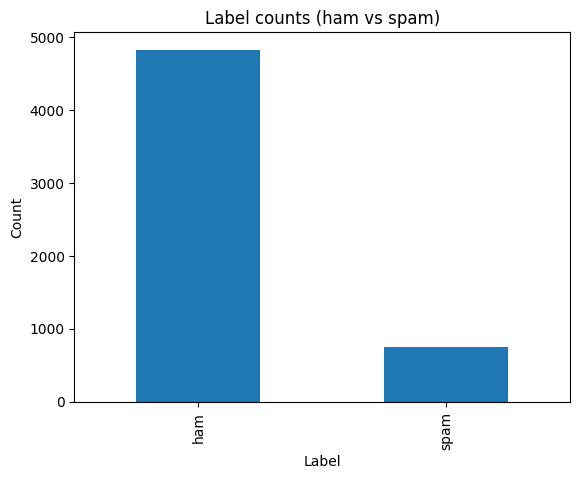

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Keep only the useful columns (common: v1=label, v2=text)
df = df.rename(columns=lambda c: c.strip())  # safe cleanup
if set(["v1", "v2"]).issubset(df.columns):
    df = df[["v1", "v2"]].rename(columns={"v1": "label", "v2": "text"})
else:
    print("Columns found:", df.columns)
    # If your column names differ, edit this line accordingly:
    # df = df[[<label_col>, <text_col>]].rename(columns={...})

df.head()

df["label"].value_counts()
df["label"].value_counts().plot(kind="bar", title="Label counts (ham vs spam)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


vectorise and encode labels with train test split, then train NB

Total samples: 5572
Train size: 4179
Test size: 1393

Label distribution (overall):
label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

Label distribution (train):
label
ham     0.865997
spam    0.134003
Name: proportion, dtype: float64

Label distribution (test):
label
ham     0.865757
spam    0.134243
Name: proportion, dtype: float64

CountVectorizer Confusion Matrix:
 [[1202    4]
 [  16  171]]
CountVectorizer Accuracy: 0.9856424982053122


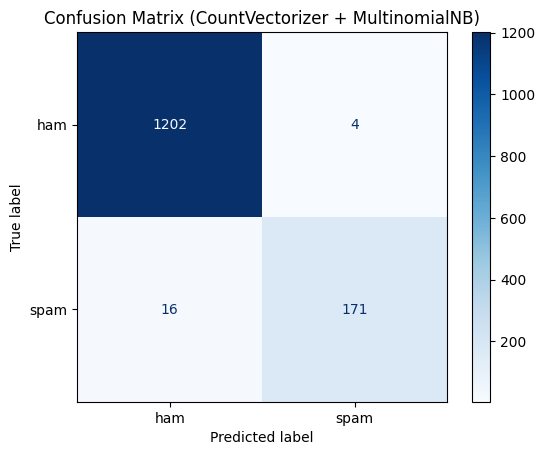

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# X text and y label encoding (spam=1, ham=0)
X_text = df["text"].astype(str)
y = df["label"].str.lower().map({"spam": 1, "ham": 0}).astype(int)

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.25, random_state=42, stratify=y
)

# --- Show the train/test process (sizes + label balance) ---
print("Total samples:", len(df))
print("Train size:", len(X_train_text))
print("Test size:", len(X_test_text))

print("\nLabel distribution (overall):")
print(y.value_counts(normalize=True).rename(index={0:"ham", 1:"spam"}))

print("\nLabel distribution (train):")
print(pd.Series(y_train).value_counts(normalize=True).rename(index={0:"ham", 1:"spam"}))

print("\nLabel distribution (test):")
print(pd.Series(y_test).value_counts(normalize=True).rename(index={0:"ham", 1:"spam"}))

# --- Vectorize (Count) ---
count_vec = CountVectorizer()
X_train_count = count_vec.fit_transform(X_train_text)
X_test_count = count_vec.transform(X_test_text)

# --- Train NB ---
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)

# --- Predict + evaluate ---
y_pred_count = nb_count.predict(X_test_count)

cm_count = confusion_matrix(y_test, y_pred_count)
acc_count = accuracy_score(y_test, y_pred_count)

print("\nCountVectorizer Confusion Matrix:\n", cm_count)
print("CountVectorizer Accuracy:", acc_count)

preview = pd.DataFrame({
    "text": X_test_text.iloc[:12].values,
    "y_true": pd.Series(y_test).iloc[:12].map({0:"ham", 1:"spam"}).values,
    "y_pred": pd.Series(y_pred_count).iloc[:12].map({0:"ham", 1:"spam"}).values
})
preview

labels = ["ham", "spam"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm_count, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (CountVectorizer + MultinomialNB)")
plt.show()


Experiment and compare

TF-IDF Confusion Matrix:
 [[1206    0]
 [  61  126]]
TF-IDF Accuracy: 0.9562096195262024


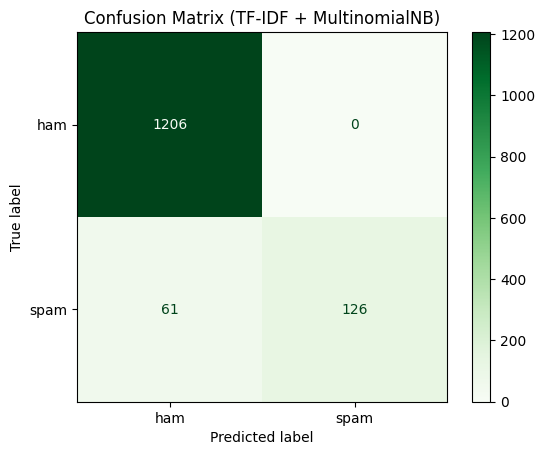

,precision,recall,f1-score,support
ham,0.986864,0.996683,0.991749,1206.000000
spam,0.977143,0.914439,0.944751,187.000000
accuracy,0.985642,0.985642,0.985642,0.985642
macro avg,0.982003,0.955561,0.968250,1393.000000
weighted avg,0.985559,0.985642,0.985440,1393.000000


,precision,recall,f1-score,support
ham,0.951855,1.000000,0.975334,1206.00000
spam,1.000000,0.673797,0.805112,187.00000
accuracy,0.956210,0.956210,0.956210,0.95621
macro avg,0.975927,0.836898,0.890223,1393.00000
weighted avg,0.958318,0.956210,0.952483,1393.00000


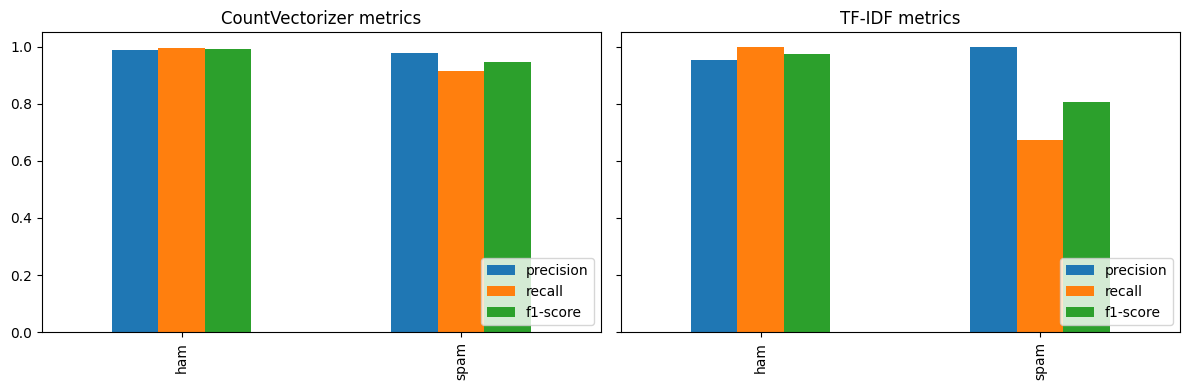

Baseline (CountVectorizer) accuracy: 0.9856424982053122
Experiment (TF-IDF) accuracy: 0.9562096195262024
Accuracy difference (TF-IDF - Count): -0.02943287867910982


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import numpy as np

tfidf_vec = TfidfVectorizer()
X_train_tfidf = tfidf_vec.fit_transform(X_train_text)
X_test_tfidf = tfidf_vec.transform(X_test_text)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("TF-IDF Confusion Matrix:\n", cm_tfidf)
print("TF-IDF Accuracy:", acc_tfidf)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=labels)
disp2.plot(cmap="Greens", values_format="d")
plt.title("Confusion Matrix (TF-IDF + MultinomialNB)")
plt.show()

report_count = classification_report(y_test, y_pred_count, target_names=labels, output_dict=True)
report_tfidf = classification_report(y_test, y_pred_tfidf, target_names=labels, output_dict=True)

df_rep_count = pd.DataFrame(report_count).T
df_rep_tfidf = pd.DataFrame(report_tfidf).T

display(df_rep_count)
display(df_rep_tfidf)

metrics = ["precision", "recall", "f1-score"]
classes_only = ["ham", "spam"]

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_rep_count.loc[classes_only, metrics].plot(kind="bar", ax=axes[0], title="CountVectorizer metrics")
axes[0].set_ylim(0, 1.05)
axes[0].legend(loc="lower right")

df_rep_tfidf.loc[classes_only, metrics].plot(kind="bar", ax=axes[1], title="TF-IDF metrics")
axes[1].set_ylim(0, 1.05)
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

print("Baseline (CountVectorizer) accuracy:", acc_count)
print("Experiment (TF-IDF) accuracy:", acc_tfidf)
print("Accuracy difference (TF-IDF - Count):", acc_tfidf - acc_count)


Link to Kaggle Dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

---
## 📤 **Submission Reminder:**  

Submit the following via PutraBlast:

- The link to your Colab notebook (as *Viewer link*). Ensure the file name is `LabNo_StudentID_Name.ipynb`.
- Link to Kaggle dataset, the confusion matrices and accuracy scores.
